# Analysis of Popular Food Items and Pricing on UberEats

## Purpose
The purpose of this project is to delve into the eating habits and preferences of Americans across different states and cities as reflected in UberEats data. By analyzing the dataset, we can uncover the most popular food categories, specific popular dishes, and their average prices, providing insights into consumer behavior and market trends in the food delivery domain.

## Questions Answered
- What are the most popular food categories in each state and the top cities within the United States?
- What specific food items are most commonly ordered, and how does their popularity vary by location?
- What is the average price of these popular food items, and how does pricing differ across categories and locations?

## Methodology

1. **Data Cleaning and Preprocessing**: Standardized the `price` column to a numeric format and extracted the `state` and `city` information from the `full_address` column. Then combined rows in the dataset where food items had the same name and category but were listed on different rows to ensure accurate average prices and item counts.

2. **Exploratory Data Analysis (EDA)**: The goal of EDA here was to identify the distribution of restaurants, the most popular food categories, and the average prices for these categories across different states and cities.

3. **Data Visualization**: Created a series of bar graphs to visualize the most popular food categories and their average prices in each state.

4. **Most Popular Foods (+Prices) Per City/State**: Created a function that generates a dataframe the contains the most popular foods and their average prices for any desired state or city.

Through these methods, we can derive meaningful insights that can help businesses understand consumer preferences and adjust their offerings accordingly.

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from uszipcode import SearchEngine
import warnings

#Read in data and check shape
df = pd.read_csv('restaurants.csv')
df2 = pd.read_csv('restaurant-menus.csv')
print(df.shape)
print(df2.shape)
display(df.head())
display(df2.head())

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

(63469, 11)
(5117217, 5)


,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


In [2]:
df.dropna(subset=['score', 'full_address'], inplace=True)
df.drop_duplicates(inplace=True)

# Initialize the SearchEngine which by default uses simple SQLite database
search = SearchEngine()

# Define a function to use with DataFrame.apply() that takes a zip code and returns the city and state
def get_city_state_by_zip(zip_code):
    result = search.by_zipcode(zip_code)
    if result:
        return result.major_city, result.state
    return None, None

# Apply the function to your DataFrame
df['city'], df['state'] = zip(*df['zip_code'].apply(get_city_state_by_zip))

# Create a combined 'city_state' column
df['city_state'] = df['city'] + ', ' + df['state']

display(df)
df.shape

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,city,state,city_state
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,Birmingham,AL,"Birmingham, AL"
6,7,27,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese",$,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440,Birmingham,AL,"Birmingham, AL"
13,14,51,Panera (521 Fieldstown Road),4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",$,"521 Fieldstown Road, Gardendale, AL, 35071",35071,33.651407,-86.819247,Gardendale,AL,"Gardendale, AL"
15,16,88,Jeni's Splendid Ice Cream (Pepper Place),5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",$$$,"219 29th St S, Birmingham, AL, 35233",35233,33.516600,-86.789950,Birmingham,AL,"Birmingham, AL"
18,19,30,Falafel Cafe,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",$,"401 19th St S, Birmingham, AL, 35233",35233,33.508353,-86.803170,Birmingham,AL,"Birmingham, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63448,63449,9,Walgreens (701 E NOLANA AVE),4.8,11.0,"Pharmacy, Convenience, Everyday Essentials, Baby",$,"701 E Nolana Ave, Mcallen, TX, 78504",78504,26.237390,-98.206520,Mcallen,TX,"Mcallen, TX"
63460,63461,114,Cosmic Wings (Mcallen North),4.4,22.0,"American, Bar Food, Wings, Fast Food, Chicken,...",$,"4601 N 10th Street, McAllen, TX, 78504",78504,26.244310,-98.223730,Mcallen,TX,"Mcallen, TX"
63462,63463,41,Whataburger (4017 N 23rd St),5.0,26.0,"Burgers, Fast Food, Burgers, Sandwiches, American",$$,"4017 N 23rd St, McAllen, TX, 78504",78504,26.242120,-98.239670,Mcallen,TX,"Mcallen, TX"
63464,63465,2,IHOP (4321 N 10th St),4.6,56.0,"American, Breakfast and Brunch, burger, Comfor...",$,"4321 N 10th St, MC ALLEN, TX, 78504",78504,26.242853,-98.223984,Mcallen,TX,"Mcallen, TX"


(35112, 14)

In [3]:
# Perform an inner join on the 'id' column from df (restaurants) and 'restaurant_id' from df2 (menus)
merged_df = pd.merge(df, df2, left_on='id', right_on='restaurant_id', how='inner')

merged_df


,id,position,name_x,score,ratings,category_x,price_range,full_address,zip_code,lat,lng,city,state,city_state,restaurant_id,category_y,name_y,description,price
0,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,Birmingham,AL,"Birmingham, AL",5,Picked for you,Pork Chop Rice with Gravy Plate,NaN,7.0 USD
1,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,Birmingham,AL,"Birmingham, AL",5,Picked for you,Full Sausage (2 pcs) with 2 Eggs,2 pieces.,7.25 USD
2,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,Birmingham,AL,"Birmingham, AL",5,Picked for you,Bacon and Egg with Cheese Breakfast Sandwich,NaN,3.5 USD
3,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,Birmingham,AL,"Birmingham, AL",5,Picked for you,Double Cheese Burger,Grilled or fried patty with cheese on a bun.,3.25 USD
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,Birmingham,AL,"Birmingham, AL",5,Picked for you,Full Bacon (3 pcs) with 2 Eggs,3 pieces.,7.25 USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143368,63468,19,Church's Chicken (620 S. 10th Street),4.3,17.0,"Fast Food, Family Meals",$,"620 S. 10th Street, McAllen, TX, 78501",78501,26.197333,-98.231369,Mcallen,TX,"Mcallen, TX",63468,Homestyle Sides,Baked Mac &amp; Cheese,"We take mac &amp; cheese, sprinkle shredded ch...",3.29 USD
3143369,63468,19,Church's Chicken (620 S. 10th Street),4.3,17.0,"Fast Food, Family Meals",$,"620 S. 10th Street, McAllen, TX, 78501",78501,26.197333,-98.231369,Mcallen,TX,"Mcallen, TX",63468,Homestyle Sides,Corn,"Sweet, buttery and bursting with flavor. Our c...",3.29 USD
3143370,63468,19,Church's Chicken (620 S. 10th Street),4.3,17.0,"Fast Food, Family Meals",$,"620 S. 10th Street, McAllen, TX, 78501",78501,26.197333,-98.231369,Mcallen,TX,"Mcallen, TX",63468,Homestyle Sides,Jalapeño Cheese Bombers®,Fried spicy jalapeño bits and creamy cheddar c...,3.29 USD
3143371,63468,19,Church's Chicken (620 S. 10th Street),4.3,17.0,"Fast Food, Family Meals",$,"620 S. 10th Street, McAllen, TX, 78501",78501,26.197333,-98.231369,Mcallen,TX,"Mcallen, TX",63468,Desserts &amp; More,Apple Pies,Satisfy your sweet tooth with our apple pie. J...,1.69 USD


In [4]:
#Check for null values, data types, and duplicates
print(merged_df.isnull().sum())
print()
print(merged_df.dtypes)
print()
print(merged_df.describe())
print()
print(merged_df.duplicated().sum())

# Find and display duplicates
duplicates = merged_df[merged_df.duplicated()]
display(duplicates)

id                    0
position              0
name_x                0
score                 0
ratings               0
category_x          863
price_range      337808
full_address          0
zip_code            214
lat                   0
lng                   0
city              47028
state             47028
city_state        47028
restaurant_id         0
category_y            0
name_y                0
description      872382
price                 0
dtype: int64

id                 int64
position           int64
name_x            object
score            float64
ratings          float64
category_x        object
price_range       object
full_address      object
zip_code          object
lat              float64
lng              float64
city              object
state             object
city_state        object
restaurant_id      int64
category_y        object
name_y            object
description       object
price             object
dtype: object

                 id      position       

,id,position,name_x,score,ratings,category_x,price_range,full_address,zip_code,lat,lng,city,state,city_state,restaurant_id,category_y,name_y,description,price
129,7,27,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese",$,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440,Birmingham,AL,"Birmingham, AL",7,Nigiri / Sashimi,Amaebi,Sweet shrimp.,7.0 USD
136,7,27,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese",$,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440,Birmingham,AL,"Birmingham, AL",7,Nigiri / Sashimi,Tuna Tataki,Seared tuna.,6.0 USD
6346,165,58,Huddle House (2751 Allison Bonnet Memorial Hwy),3.8,80.0,"American, Breakfast &amp; Brunch, Salads",$,"2751 ALLISON BONNET MEMORIAL HWY, HUEYTOWN, AL...",35023,33.454790,-86.966790,Bessemer,AL,"Bessemer, AL",165,Beverages,Strawberry Lemonade,Chilled lemonade infused with the sweet taste ...,3.83 USD
16144,381,138,Flying Biscuit Cafe (The Shops of the Colonnade),4.8,100.0,"Breakfast and Brunch, American, Sandwiches",$,"3419 Colonnade Pkwy #100, Birmingham, AL, 35243",35243,33.438383,-86.728595,Birmingham,AL,"Birmingham, AL",381,"Breakfast Sandwich, Breakfast Burritos and Gri...",Egg &amp; Cheese Biscuit,NaN,3.59 USD
20471,463,17,Taste Of Thailand,4.7,100.0,"Asian, Thai, Desserts, Family Friendly",$$,"3321 Lorna Rd, Hoover, AL, 35216",35216,33.392932,-86.795943,Birmingham,AL,"Birmingham, AL",463,CHANOM BOBA TEA,Hazelnut Milk Tea,NaN,4.5 USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142741,63445,4,Stripes (4829 N 10th Street),3.5,68.0,"Everyday Essentials, Convenience, Home &amp; P...",$,"4829 N 10TH STREET, Mcallen, TX, 78504",78504,26.247360,-98.223000,Mcallen,TX,"Mcallen, TX",63445,Grocery,International Delight French Vanilla Creamer 1...,Sweet temptation created in the form of French...,3.69 USD
3142743,63445,4,Stripes (4829 N 10th Street),3.5,68.0,"Everyday Essentials, Convenience, Home &amp; P...",$,"4829 N 10TH STREET, Mcallen, TX, 78504",78504,26.247360,-98.223000,Mcallen,TX,"Mcallen, TX",63445,Grocery,Kraft American Cheese Slices 12oz,Unmistakable creamy melt and American flavor i...,6.69 USD
3142745,63445,4,Stripes (4829 N 10th Street),3.5,68.0,"Everyday Essentials, Convenience, Home &amp; P...",$,"4829 N 10TH STREET, Mcallen, TX, 78504",78504,26.247360,-98.223000,Mcallen,TX,"Mcallen, TX",63445,Grocery,Campbell's Chicken Noodle Soup Cup 15.4oz,A sublime soul-warming classic filled with ood...,4.39 USD
3143121,63449,9,Walgreens (701 E NOLANA AVE),4.8,11.0,"Pharmacy, Convenience, Everyday Essentials, Baby",$,"701 E Nolana Ave, Mcallen, TX, 78504",78504,26.237390,-98.206520,Mcallen,TX,"Mcallen, TX",63449,Spring & Summer,Moon & Stars My Favorite Plush - 1.0 ea,It is a warm & cozy cuddle pal that keeps your...,13.63 USD


In [5]:
#Drop null values and duplicates
merged_df.dropna(subset=['city'], inplace=True)
merged_df.drop_duplicates(inplace=True)

#Check again for null values, data types, and duplicates
print(merged_df.isnull().sum())
print()
print(merged_df.dtypes)
print()
print(merged_df.describe())
print()
print(merged_df.duplicated().sum())

# Find and display duplicates (should be empty this time)
duplicates = merged_df[merged_df.duplicated()]
display(duplicates)

id                    0
position              0
name_x                0
score                 0
ratings               0
category_x          863
price_range      332149
full_address          0
zip_code              0
lat                   0
lng                   0
city                  0
state                 0
city_state            0
restaurant_id         0
category_y            0
name_y                0
description      856332
price                 0
dtype: int64

id                 int64
position           int64
name_x            object
score            float64
ratings          float64
category_x        object
price_range       object
full_address      object
zip_code          object
lat              float64
lng              float64
city              object
state             object
city_state        object
restaurant_id      int64
category_y        object
name_y            object
description       object
price             object
dtype: object

                 id      position       

,id,position,name_x,score,ratings,category_x,price_range,full_address,zip_code,lat,lng,city,state,city_state,restaurant_id,category_y,name_y,description,price


In [6]:
# Remove the 'USD' part and convert the rest to a float, with error handling
merged_df['price'] = pd.to_numeric(merged_df['price'].str.replace(' USD', ''), errors='coerce')
merged_df.head()

,id,position,name_x,score,ratings,category_x,price_range,full_address,zip_code,lat,lng,city,state,city_state,restaurant_id,category_y,name_y,description,price
0,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.51473,-86.8117,Birmingham,AL,"Birmingham, AL",5,Picked for you,Pork Chop Rice with Gravy Plate,NaN,7.00
1,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.51473,-86.8117,Birmingham,AL,"Birmingham, AL",5,Picked for you,Full Sausage (2 pcs) with 2 Eggs,2 pieces.,7.25
2,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.51473,-86.8117,Birmingham,AL,"Birmingham, AL",5,Picked for you,Bacon and Egg with Cheese Breakfast Sandwich,NaN,3.50
3,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.51473,-86.8117,Birmingham,AL,"Birmingham, AL",5,Picked for you,Double Cheese Burger,Grilled or fried patty with cheese on a bun.,3.25
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.51473,-86.8117,Birmingham,AL,"Birmingham, AL",5,Picked for you,Full Bacon (3 pcs) with 2 Eggs,3 pieces.,7.25


## EDA
- After the cleaning process, the dataset predominantly features restaurants from Texas, with Virginia and Washington also being well-represented, albeit to a lesser extent.
- Beverages and side dishes appear to be quite popular on UberEats, which is somewhat surprising given the initial hypothesis that complete meals would be the primary interest on this platform.
- Beverages across NY, TX, and VA seem to be priced similarly. They're expensive, but they're priced similarly.

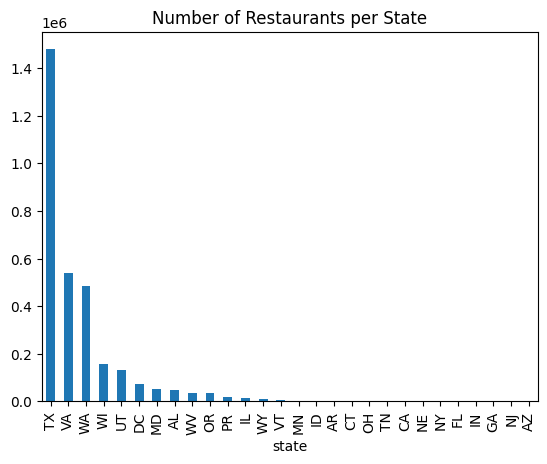

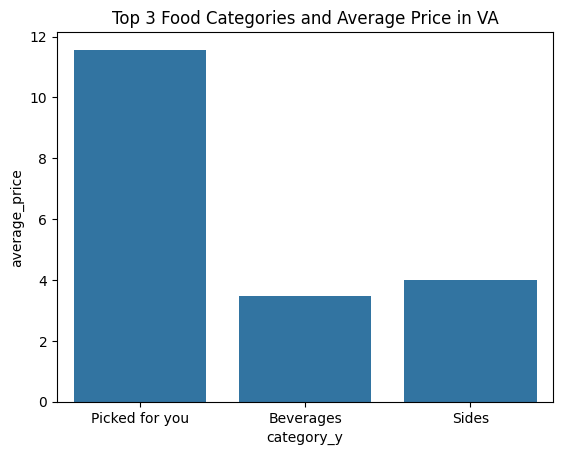

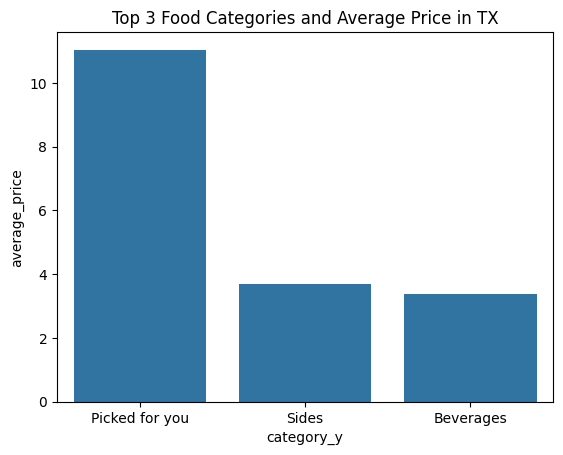

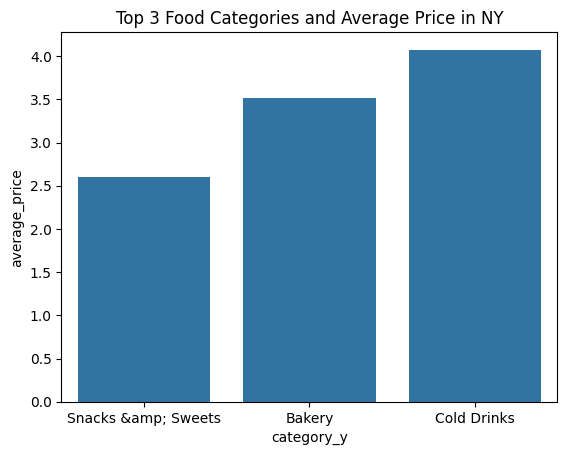

In [21]:
# Count the number of restaurants in each state
state_counts = merged_df['state'].value_counts()

# Count the number of restaurants in each city
city_counts = merged_df['city'].value_counts()

# Group by state and category_y and count the occurrences
category_y_counts_by_state = merged_df.groupby(['state', 'category_y'])['id'].count().reset_index(name='count')

# Sort and find the top categories for each state
top_categories_by_state = category_y_counts_by_state.sort_values(['state', 'count'], ascending=[True, False])


# Group by state and category_y and calculate the average price
average_price_by_category_y_state = merged_df.groupby(['state', 'category_y'])['price'].mean().reset_index(name='average_price')

# Merge this with the top_categories_by_state to see the average prices of the top categories
top_categories_with_price = pd.merge(top_categories_by_state, average_price_by_category_y_state, on=['state', 'category_y'])

# Plot the number of restaurants per state
state_counts.plot(kind='bar', title='Number of Restaurants per State')
plt.show()

# Plot the top food categories in a few selected states
for state in ['VA', 'TX', 'NY']:  # Example states
    subset = top_categories_with_price[top_categories_with_price['state'] == state].head(3)  # Top 3 categories
    sns.barplot(x='category_y', y='average_price', data=subset)
    plt.title(f'Top 3 Food Categories and Average Price in {state}')
    plt.show()

I was curious about what 'Picked for you' was, so I decided to investigate a bit further. It turns out, 'Picked for you' is a feature on UberEats that utilizes an algorithm to suggest food items tailored to a user's past orders and preferences. And it seems to be working quite well since it's used so commonly. This highlights the impact and utility of personalized and tailored solutions that utilized machine learning.

In [8]:
picked_for_you_rows = merged_df[merged_df['category_y'] == 'Picked for you']
picked_for_you_rows


,id,position,name_x,score,ratings,category_x,price_range,full_address,zip_code,lat,lng,city,state,city_state,restaurant_id,category_y,name_y,description,price
0,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,Birmingham,AL,"Birmingham, AL",5,Picked for you,Pork Chop Rice with Gravy Plate,NaN,7.00
1,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,Birmingham,AL,"Birmingham, AL",5,Picked for you,Full Sausage (2 pcs) with 2 Eggs,2 pieces.,7.25
2,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,Birmingham,AL,"Birmingham, AL",5,Picked for you,Bacon and Egg with Cheese Breakfast Sandwich,NaN,3.50
3,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,Birmingham,AL,"Birmingham, AL",5,Picked for you,Double Cheese Burger,Grilled or fried patty with cheese on a bun.,3.25
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,Birmingham,AL,"Birmingham, AL",5,Picked for you,Full Bacon (3 pcs) with 2 Eggs,3 pieces.,7.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143327,63468,19,Church's Chicken (620 S. 10th Street),4.3,17.0,"Fast Food, Family Meals",$,"620 S. 10th Street, McAllen, TX, 78501",78501,26.197333,-98.231369,Mcallen,TX,"Mcallen, TX",63468,Picked for you,3 Piece Combo,Three pieces of chicken with two regular sides...,9.99
3143328,63468,19,Church's Chicken (620 S. 10th Street),4.3,17.0,"Fast Food, Family Meals",$,"620 S. 10th Street, McAllen, TX, 78501",78501,26.197333,-98.231369,Mcallen,TX,"Mcallen, TX",63468,Picked for you,6 Piece Chicken,"Six pieces of chicken with two regular sides, ...",15.99
3143329,63468,19,Church's Chicken (620 S. 10th Street),4.3,17.0,"Fast Food, Family Meals",$,"620 S. 10th Street, McAllen, TX, 78501",78501,26.197333,-98.231369,Mcallen,TX,"Mcallen, TX",63468,Picked for you,16 Piece Tenders,Served with Choice of 2Large sides and 4 scrat...,29.99
3143330,63468,19,Church's Chicken (620 S. 10th Street),4.3,17.0,"Fast Food, Family Meals",$,"620 S. 10th Street, McAllen, TX, 78501",78501,26.197333,-98.231369,Mcallen,TX,"Mcallen, TX",63468,Picked for you,5 Piece Tenders,"Served with a regular drink, your choice of an...",10.99


## Most Popular Food Categories (+ Average Prices) Visualizations

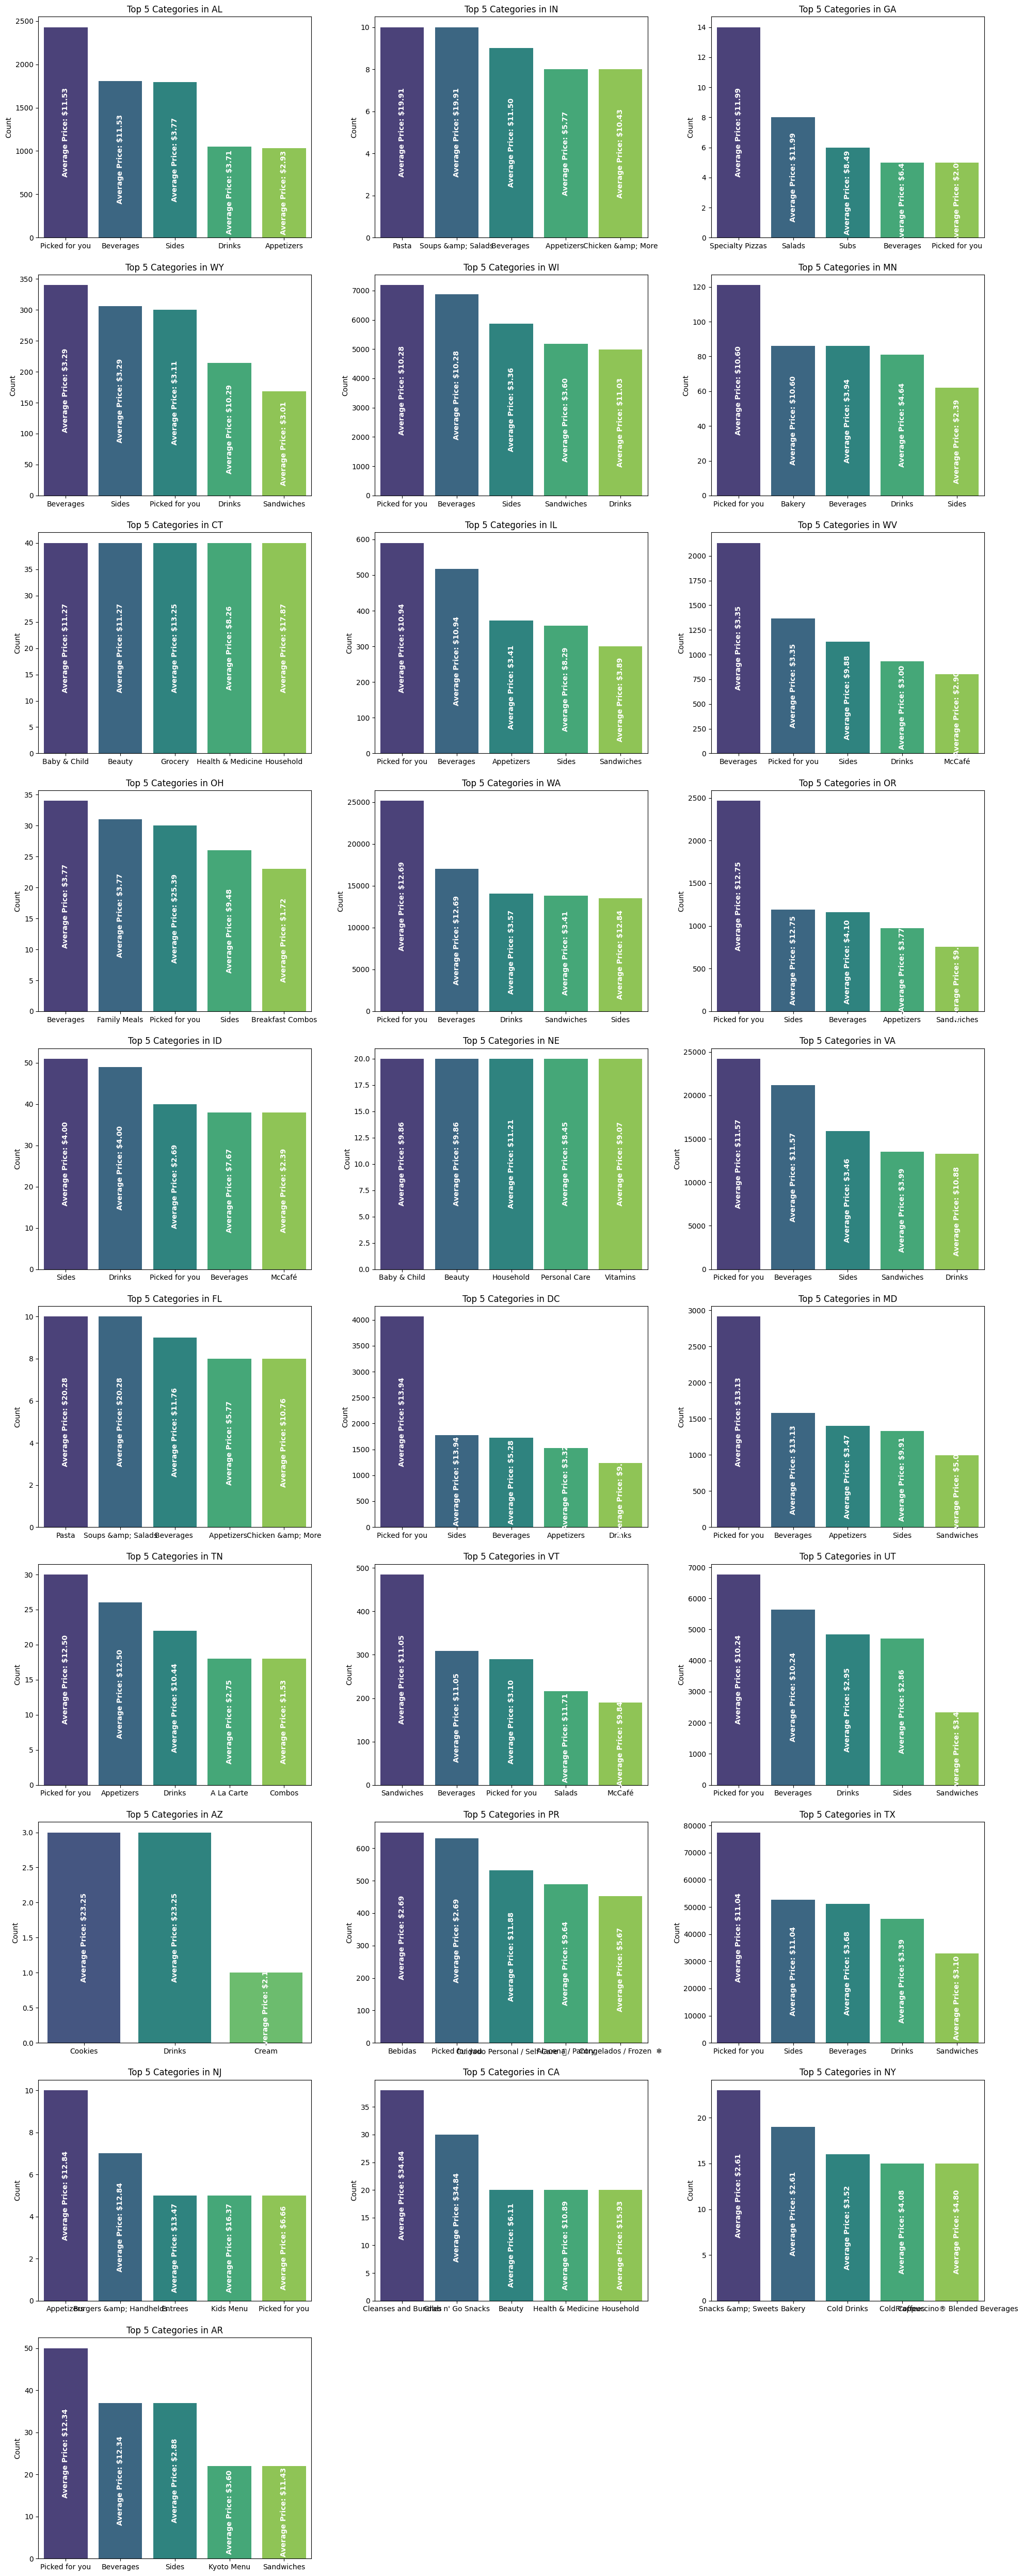

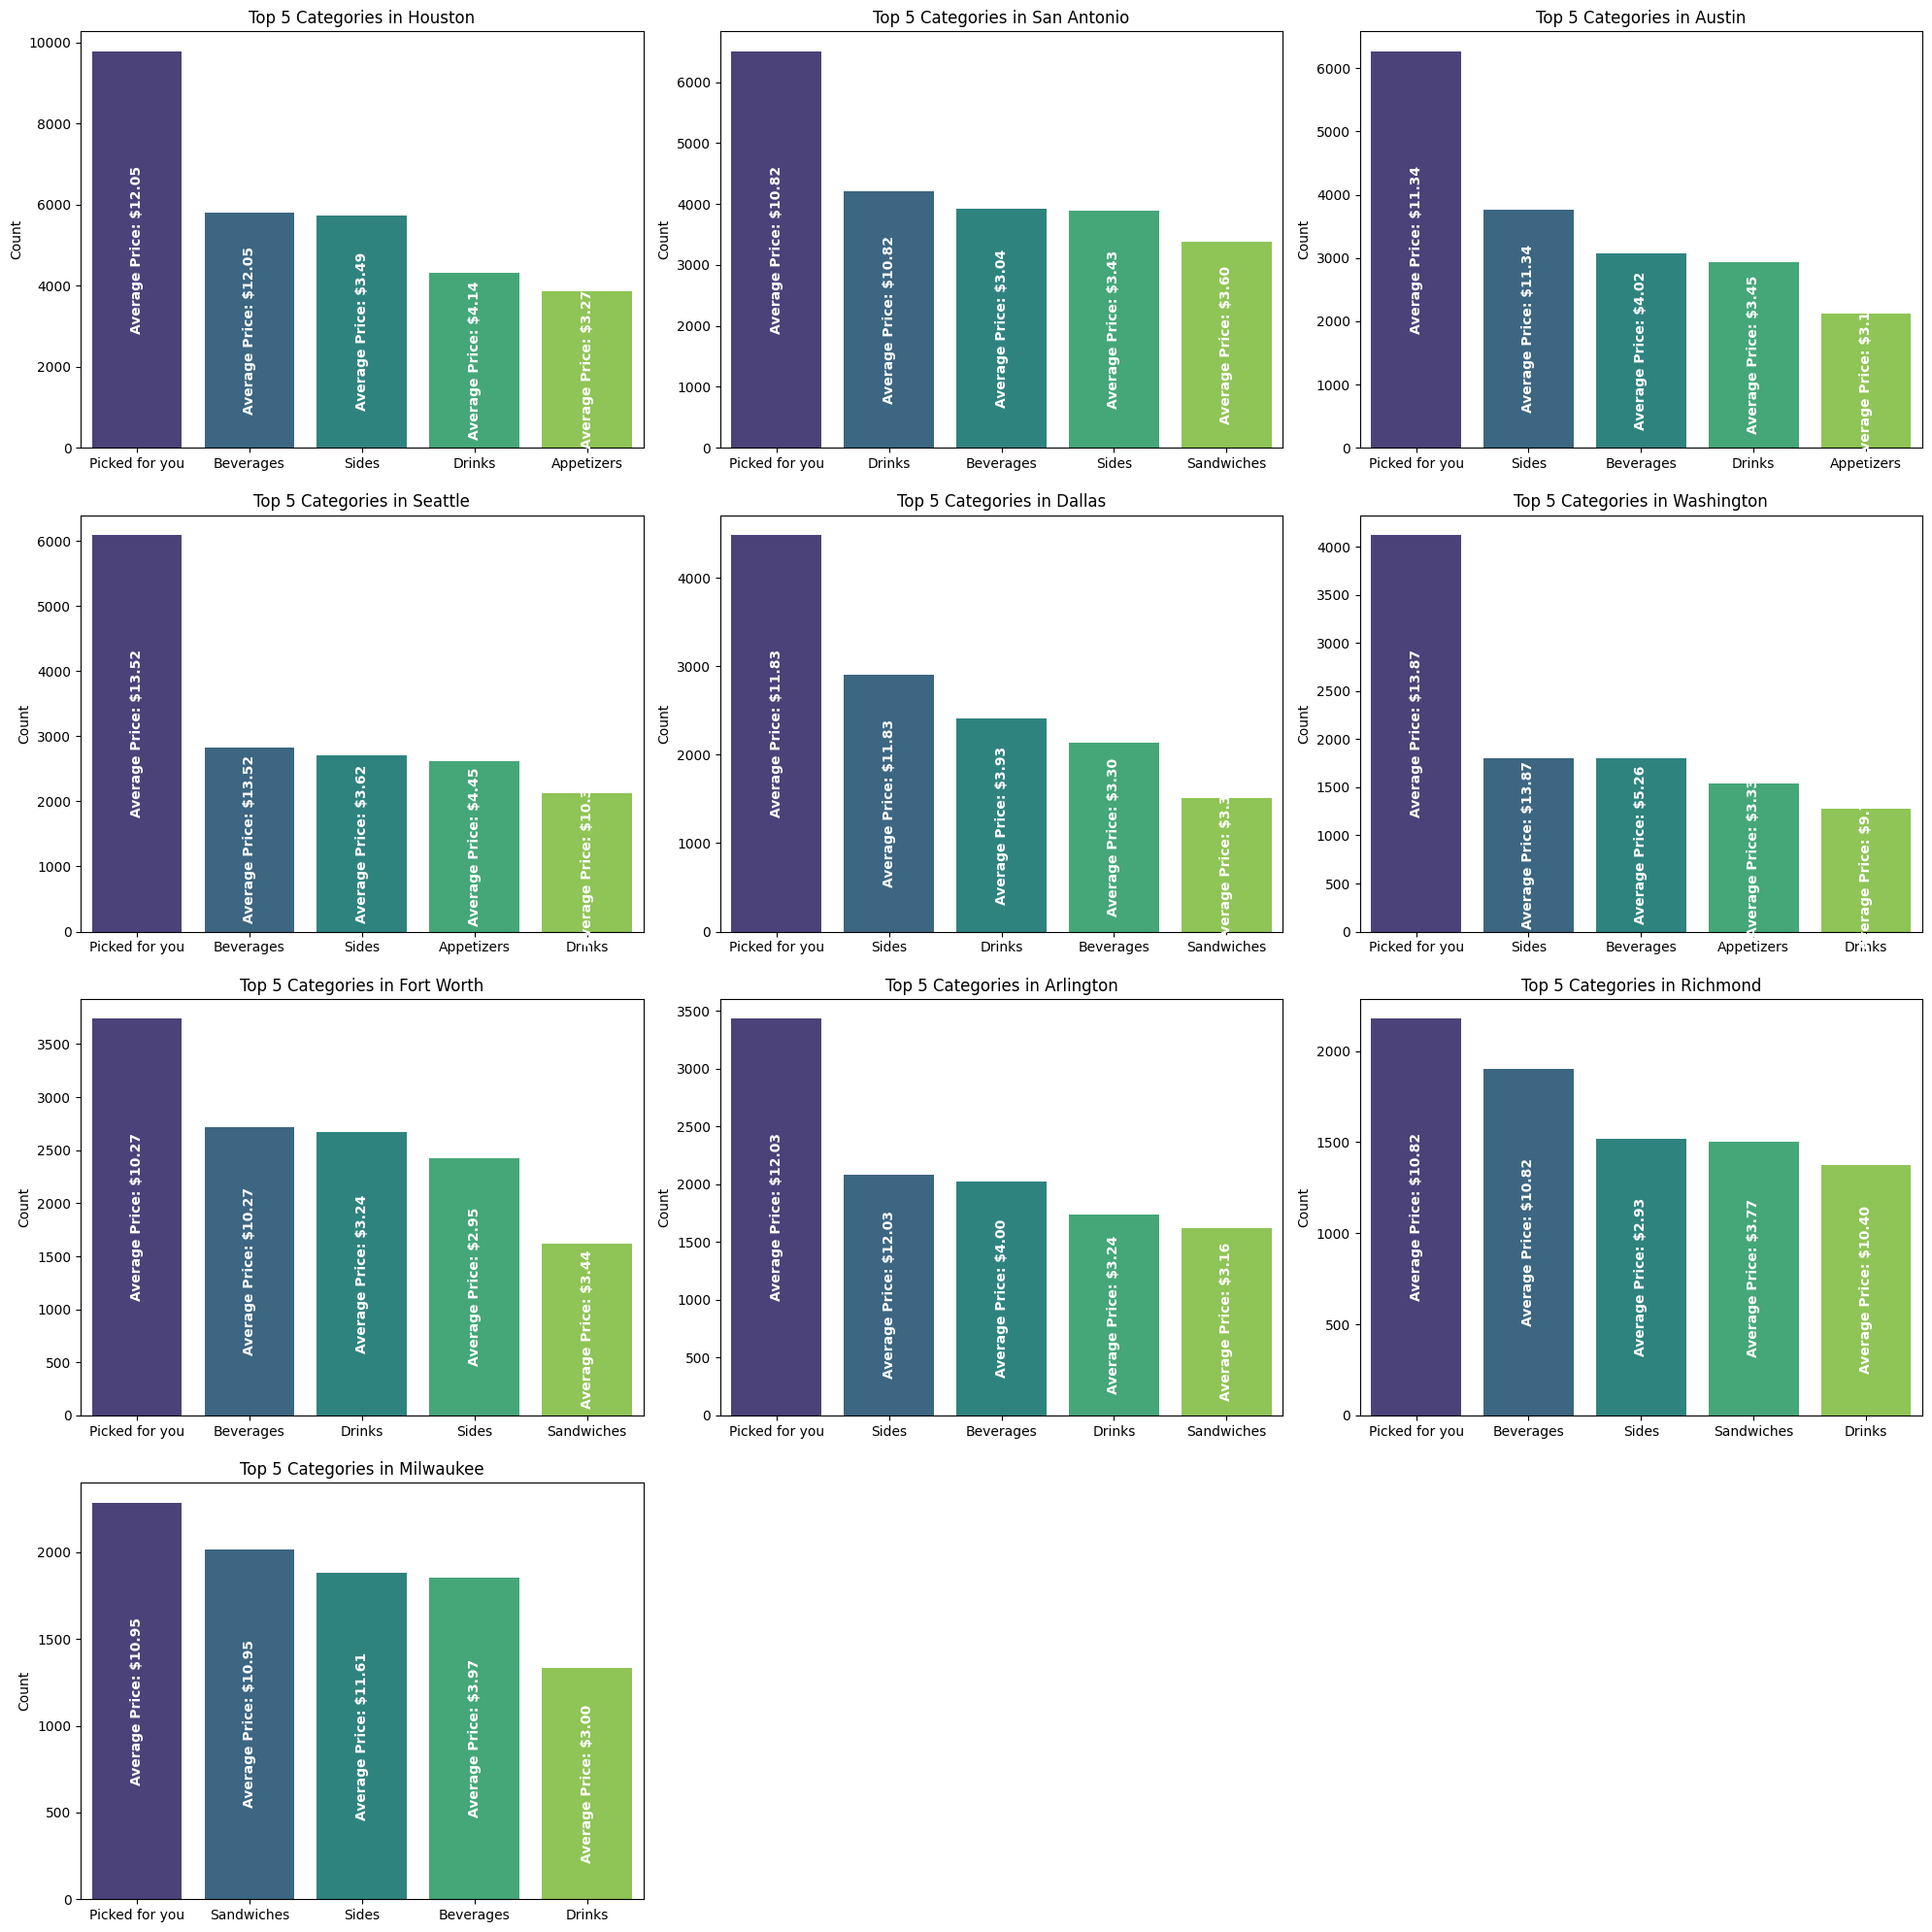

In [9]:
# Suppress future warnings (there's one from Seaborn here and I can't fix it on my end because it has something to do with the library itself)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Suppress user warnings (there's one from Seaborn here about font that I'm unable to resolve with rcParams)
warnings.simplefilter(action='ignore', category=UserWarning)

# Calculate the sum of menu items per category_y and their average price
category_y_summary = merged_df.groupby(['state', 'category_y']).agg({'id': 'count', 'price': 'mean'}).reset_index()
category_y_summary.rename(columns={'id': 'item_count', 'price': 'average_price'}, inplace=True)

# Calculate the sum of menu items per category and their average price for cities
city_category_summary = merged_df.groupby(['city', 'category_y']).agg({'id': 'count', 'price': 'mean'}).reset_index()
city_category_summary.rename(columns={'id': 'item_count', 'price': 'average_price'}, inplace=True)

# Calculate the top 10 cities by the number of restaurants
top_10_cities = merged_df['city'].value_counts().head(10).index.tolist()

def plot_category_count_price_subplots(df, base_df, state_or_city, plots_per_row=3):

    # Calculate the number of required rows to display all cities
    num_cities = len(df)
    num_rows = -(-num_cities // plots_per_row)  # Ceiling division

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, num_rows*5))  # Adjust the size as needed
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    # Loop through all unique citys and plot
    for i, x in enumerate(df):
        # Filter for the specific city
        df = base_df[base_df[state_or_city] == x].nlargest(5, 'item_count')
        
        # Sort categories by item count for better visualization
        df.sort_values('item_count', ascending=False, inplace=True)
        
        # Select the i-th subplot
        ax = axes[i]
        
        # Create the barplot
        sns.barplot(x='category_y', y='item_count', data=df, palette='viridis', hue='category_y', legend=False, ax=ax)
        
        # Set the title and labels
        ax.set_title(f'Top 5 Categories in {x}')
        ax.set_xlabel('')
        ax.set_ylabel('Count')
        
        # Add labels for average price
        for p in ax.patches:
            # Extract the category name directly from the x-axis label
            category = ax.get_xticklabels()[int(p.get_x())].get_text()
            # Filter the DataFrame for the current category and check if not empty
            filtered_df = df[df['category_y'] == category]
            if not filtered_df.empty:
                # Get the average price for the current category
                avg_price = filtered_df['average_price'].values[0]
                # Annotate the bar with the average price
                ax.annotate(f'Average Price: ${avg_price:.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()/2),  # Position it at half the height of the bar
                    ha='center', va='center', 
                    color='white',  # Text color
                    weight='bold',  # Make text bold
                    rotation='vertical',  # Rotate text
                    xytext=(0, 0),  # Adjust text position here if needed
                    textcoords='offset points')


    # Hide any unused subplots
    for j in range(i+1, num_rows * plots_per_row):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.rcParams['font.family'] = 'DejaVu Sans'
    plt.show()

# Plot the top 5 categories for each state
plot_category_count_price_subplots(merged_df['state'].unique(), category_y_summary, 'state', plots_per_row=3)

# Plot the top 5 categories for each city
plot_category_count_price_subplots(top_10_cities, city_category_summary, 'city', plots_per_row=3)    


## Most Popular Foods (+ Prices) Per State/City

In [12]:
item_summary_state = merged_df.groupby(['state', 'name_y'])['price'].agg(['mean', 'count']).reset_index()
item_summary_state.rename(columns={'mean': 'average_price', 'count': 'item_count'}, inplace=True)

item_summary_city = merged_df.groupby(['city', 'name_y'])['price'].agg(['mean', 'count']).reset_index()
item_summary_city.rename(columns={'mean': 'average_price', 'count': 'item_count'}, inplace=True)

def display_food_items_by_location(state=None, city=None):
    if state and city:
        print("Please specify either a state or a city, not both.")
        return
    
    if state:
        filtered_items = item_summary_state[item_summary_state['state'] == state]
    elif city:
        filtered_items = item_summary_city[item_summary_city['city'] == city]
    else:
        print("You must specify either a state or a city.")
        return
    
    # Display the DataFrame sorted by item count
    return filtered_items.sort_values('item_count', ascending=False)[['name_y', 'average_price', 'item_count']].reset_index(drop=True)

# Example usage:
# To get the food items for the state of Texas
display_food_items_by_location(state='TX').head(20)

# Or to get the food items for the city of New York
display_food_items_by_location(city='Austin')

,name_y,average_price,item_count
0,Bottled Water,2.267207,222
1,French Fries,3.871356,177
2,Diet Coke,2.671834,169
3,Sprite,2.628303,165
4,Coke,2.728867,150
...,...,...,...
44960,Gatorade Fierce Blue Cherry 28oz,2.890000,1
44961,Gatorade Cool Blue Sports Drink 24oz,2.390000,1
44962,Gatorade Berry Zero (32 oz),3.190000,1
44963,Gatorade 20oz,3.000000,1


In [11]:
#List of cities and states (for reference in the above function)
print(merged_df['city'].unique())
print()
print(merged_df['state'].unique())

['Birmingham' 'Gardendale' 'Fultondale' 'Bessemer' 'Fairfield'
 'Pleasant Grove' 'Graysville' 'Gadsden' 'Alabaster' 'Pelham' 'Helena'
 'Mc Calla' 'Dothan' 'Huntsville' 'Madison' 'Meridianville' 'Athens'
 'Mishawaka' 'Harvest' 'Toney' 'Decatur' 'Cullman' 'Owens Cross Roads'
 'Albertville' 'Guntersville' 'Orange Beach' 'Foley' 'Gulf Shores'
 'Mcdonough' 'Jackson' 'Cheyenne' 'Fe Warren AFB' 'Casper' 'Evansville'
 'Gillette' 'Appleton' 'Green Bay' 'Kimberly' 'De Pere' 'Menasha'
 'Little Chute' 'Kaukauna' 'Wisconsin Dells' 'Baraboo' 'Oshkosh' 'Neenah'
 'New Berlin' 'Greendale' 'Milwaukee' 'Brookfield' 'Oak Creek' 'Franklin'
 'Hales Corners' 'Waukesha' 'Elm Grove' 'Cudahy' 'Mequon'
 'Menomonee Falls' 'Germantown' 'Wausau' 'Schofield' 'Rothschild'
 'Pewaukee' 'South Milwaukee' 'La Crosse' 'Onalaska' 'West Bend'
 'Sun Prairie' 'Verona' 'Middleton' 'Waunakee' 'Kenosha' 'Racine'
 'Pleasant Prairie' 'Caledonia' 'Sturtevant' 'Superior' 'Duluth' 'Plover'
 'Greenville' 'Sheboygan' 'Saint Francis' 'H

    Note: The assumption made for most popular was that if a multitude of restaurants are selling the same category, then that category is popular among customers. Based on this assumption, food category counts per state/city were used as the metric for popularity. Future tests could be made more robust by adding the score and rating values into this measurement. However, there was a significant amount of data missing from these columns, so I decided against using it for this analysis. More data could make this method more valuble in the future.